# Setup

In [1]:
LOG_PLOT = False
NDAYS=100

In [2]:
%matplotlib notebook
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
import os
from helper import *
from datetime import datetime
from ecdc import ECDC

## ECDC Data

In [3]:
ecdc = ECDC()
df = ecdc.df
print(ecdc.df.dateRep.max())
df.columns


2020-11-06 00:00:00


Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

## DF Subsets

In [4]:
EU = df[df.continentExp=='Europe']
AMERICA = df[(df.continentExp=='America')]
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

# Overview

In [5]:
ecdc.overview(df).head(5)

dateRep         cases  \
                             latest   rolling_avg   
countriesAndTerritories                             
United_States_of_America 2020-11-06  94681.142857   
India                    2020-11-06  46124.714286   
France                   2020-11-06  45514.000000   
Italy                    2020-11-06  29754.857143   
United_Kingdom           2020-11-06  22551.000000   

                                                                       deaths  \
                                                  last_5_days     max     sum   
countriesAndTerritories                                                         
United_States_of_America  81001, 83883, 92734, 102507, 122436  122436  234937   
India                       45231, 38310, 46253, 50210, 47638   97894  124985   
France                      49290, 52518, 36330, 40558, 58046   58046   39037   
Italy                       29905, 22253, 28241, 30548, 34502   34502   40192   
United_Kingdom              23254, 18950, 20018, 25177, 24138   26687   48120   

                                                      \
                         last_7_days_sum rolling_avg   
countriesAndTerritories                                
United_States_of_America            6269  895.571429   
India                               3895  556.428571   
France                              3017  431.000000   
Italy                               2070  295.714286   
United_Kingdom                      2165  309.285714   

                                                            \
                                         last_5_days   max   
countriesAndTerritories                                      
United_States_of_America  440, 555, 1076, 1102, 1208  4928   
India                        496, 490, 514, 704, 670  2003   
France                       231, 416, 854, 385, 363  2004   
Italy                        208, 233, 353, 352, 428   971   
United_Kingdom               162, 136, 397, 492, 378  1224   

                         Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
                                                                             latest   
countriesAndTerritories                                                               
United_States_of_America                                         364.846551           
India                                                             47.599791           
France                                                           898.818217           
Italy                                                            595.022699           
United_Kingdom                                                   469.232635           

                                      
                                 max  
countriesAndTerritories               
United_States_of_America  364.846551  
India                      94.173835  
France                    898.818217  
Italy                     595.022699  
United_Kingdom            469.232635

## Deaths

<IPython.core.display.Javascript object>


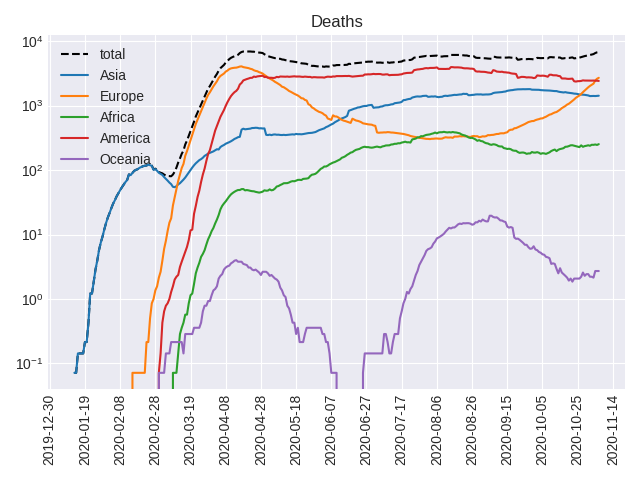

In [9]:
f, ax = plt.subplots()
deaths =ecdc.df.groupby('dateRep').agg({'deaths':'sum'})
ax.plot(deaths.index, deaths.deaths.rolling(14).mean(), label='total', c='k', linestyle='--')
continents = ecdc.df.continentExp.unique()
for c in continents:
    if c=='Other': continue
    df_deaths =ecdc.df[ecdc.df.continentExp==c].groupby('dateRep').agg({'deaths':'sum'})
    ax.plot(df_deaths.index, df_deaths.deaths.rolling(14).mean(), label=c.replace('_',' '))
    
    
pretty_plot(ax, log=True,title='Deaths')

# Austria, USA, India, UK, Netherlands and Germany

## Comparison - cumulative number for 14 days of cases per 100000

<IPython.core.display.Javascript object>


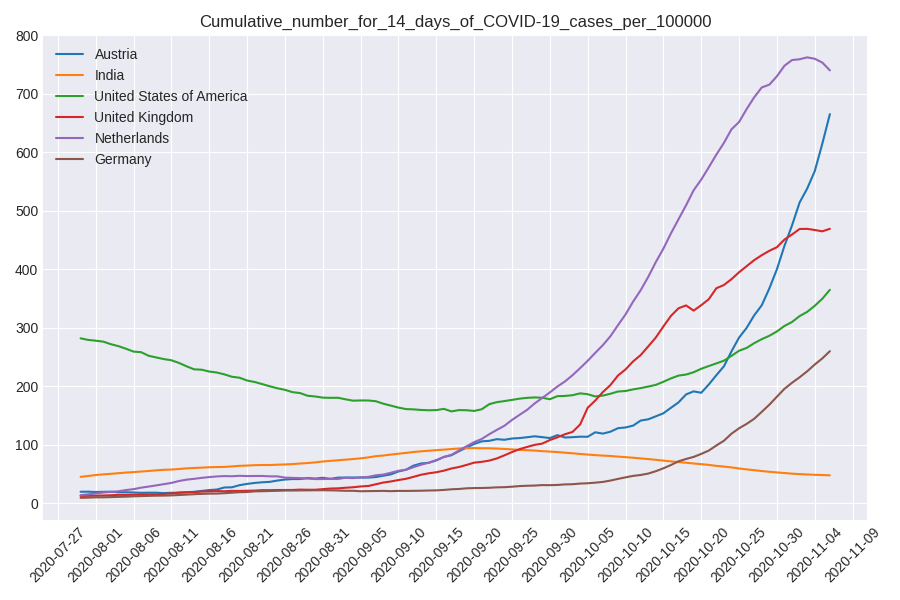

<AxesSubplot:title={'center':'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'}>

In [10]:
# countries = ['AT', 'IN', 'US', 'UK', 'DE', 'NL', 'FR',  'IT', 'ES','EL' ]
countries = ('AT', 'IN', 'US', 'UK', 'NL', 'DE')
SELECTION =  df[df.geoId.isin(countries)]

ecdc.plot_comparison(countries, log=False, ndays=100)
# ecdc.overview(SELECTION)


## Deaths

<IPython.core.display.Javascript object>


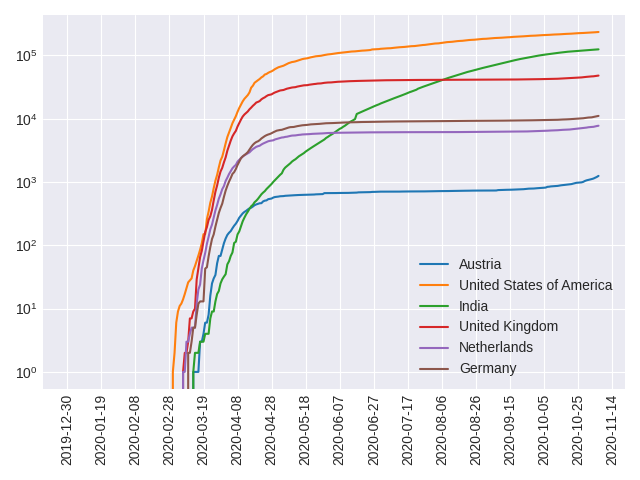

In [12]:
f,ax = plt.subplots()
countries = ('AT', 'US', 'IN', 'UK', 'NL', 'DE')
for c in countries:
    df = ecdc.select_country(c)
    popData2019 = df.iloc[0].popData2019
    label = df.iloc[0].countriesAndTerritories.replace('_',' ')

    ax.plot(df.dateRep, df.deaths.cumsum(), label=label)

pretty_plot(ax,log=True)

## Cases

<IPython.core.display.Javascript object>


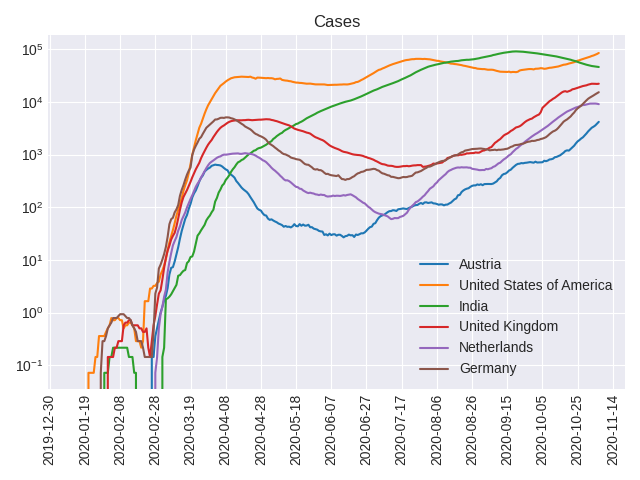

In [13]:
f,ax = plt.subplots()
countries = ('AT', 'US', 'IN', 'UK', 'NL', 'DE')
for c in countries:
    df = ecdc.select_country(c)
    popData2019 = df.iloc[0].popData2019
    label = df.iloc[0].countriesAndTerritories.replace('_',' ')

    ax.plot(df.dateRep, df.cases.rolling(14).mean(), label=label)

pretty_plot(ax,log=True,title='Cases')

# Sweden and the world

<IPython.core.display.Javascript object>


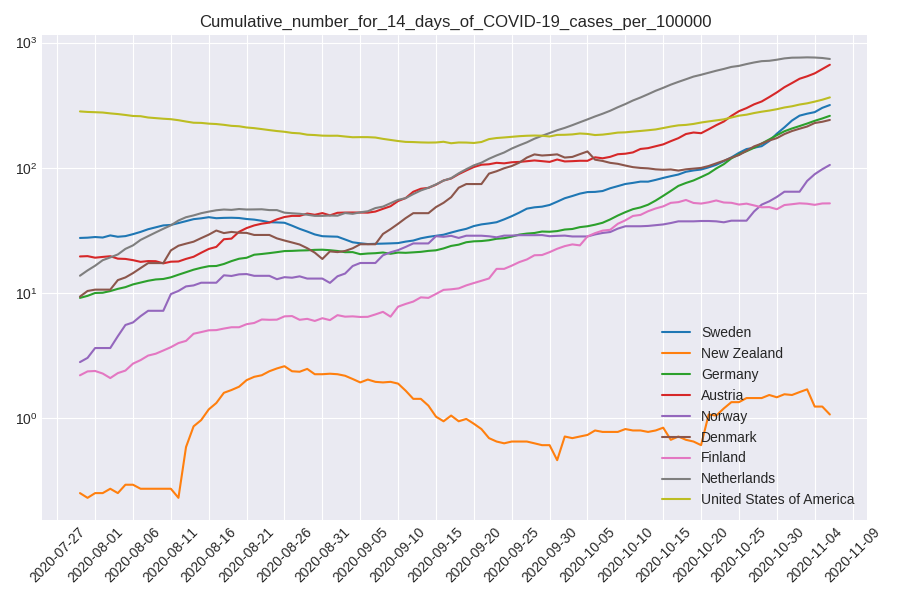

<AxesSubplot:title={'center':'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'}>

In [14]:
countries = ('SE', 'NZ','DE','AT','NO','DK','FI','NL','US')
ecdc.plot_comparison(countries, log=True, ndays=100)


# Europe

## Fastest growing number of cases per 100,000

<IPython.core.display.Javascript object>


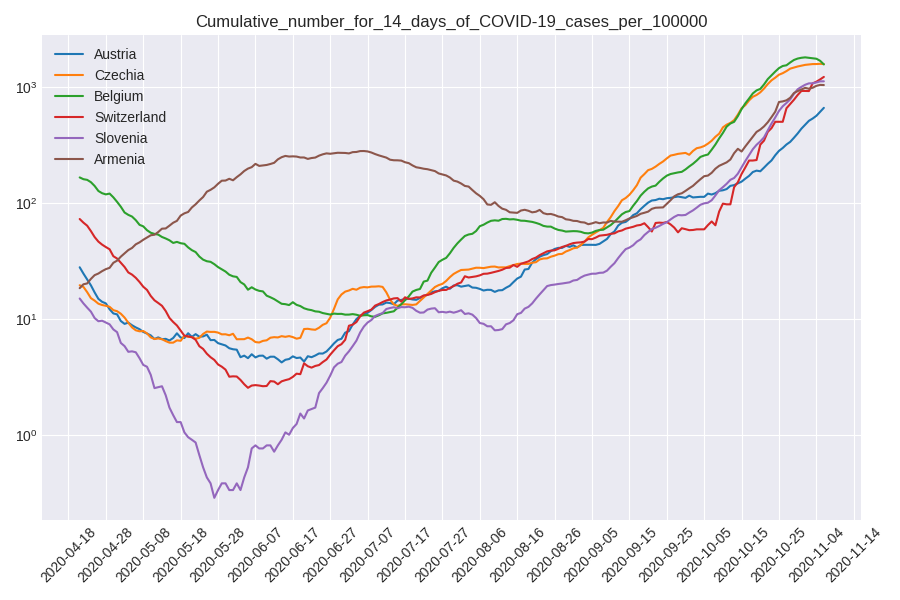

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
13014,2020-11-06,6,11,2020,13229,197,Czechia,CZ,CZE,10649800.0,Europe,1585.757479
4803,2020-11-06,6,11,2020,5,22,Belgium,BE,BEL,11455519.0,Europe,1575.747026
47271,2020-11-06,6,11,2020,10098,62,Switzerland,CH,CHE,8544527.0,Europe,1229.676025
44601,2020-11-06,6,11,2020,1686,20,Slovenia,SI,SVN,2080908.0,Europe,1126.575514
2022,2020-11-06,6,11,2020,2210,30,Armenia,AM,ARM,2957728.0,Europe,1045.971773
17742,2020-11-06,6,11,2020,58046,363,France,FR,FRA,67012883.0,Europe,898.818217
34964,2020-11-06,6,11,2020,6957,87,Netherlands,NL,NLD,17282163.0,Europe,740.150408
18759,2020-11-06,6,11,2020,2775,22,Georgia,GE,GEO,3996762.0,Europe,730.341211
12000,2020-11-06,6,11,2020,2848,29,Croatia,HR,HRV,4076246.0,Europe,725.299700
2866,2020-11-06,6,11,2020,7051,47,Austria,AT,AUT,8858775.0,Europe,665.340298


In [15]:
EU_med = EU[EU.popData2019>2000000]
EU_most = EU_med.sort_values(['dateRep', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], ascending=[False,False]).head(10)

geoIds = EU_med.sort_values(['dateRep', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], ascending=[False,False]).head(5).geoId.to_list()

ecdc.plot_comparison(['AT', *geoIds ], log=True, ndays=200, field='Cumulative_number_for_14_days_of_COVID-19_cases_per_100000');
EU_most


## Most deaths

['IT', 'UK', 'PL', 'FR', 'RU']


<IPython.core.display.Javascript object>


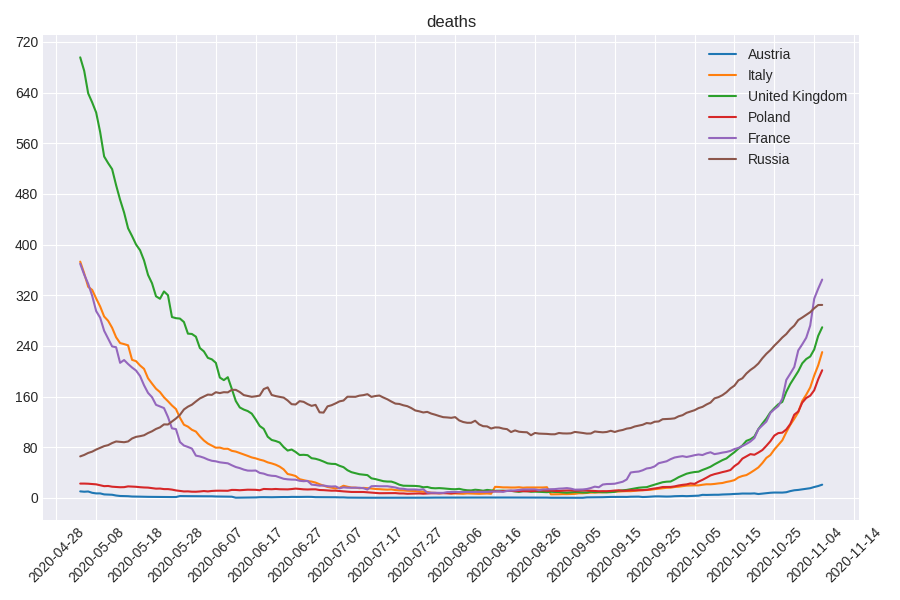

In [16]:
geoIds = EU_med.sort_values(['dateRep', 'deaths'], ascending=[False,False]).head(5).geoId.to_list()
print(geoIds)
ecdc.plot_comparison(['AT', *geoIds ], log=False, ndays=200, field='deaths', roll_days=14);



# Commit and Push

In [54]:
%cd Documents/code/covid19/
now = datetime.now()
commit_message = "Last run on " + now.strftime('%Y-%m-%d %H:%M')
commit_message
! echo $commit_message > commit_message.txt
! git add .
! git commit -F commit_message.txt
! git push


[Errno 2] No such file or directory: 'Documents/code/covid19/'
/home/gythaogg/Documents/code/covid19/notebooks
[feature/angular 1531925] Last run on 2020-11-06 14:23
 5 files changed, 15987 insertions(+), 16457 deletions(-)
 rewrite notebooks/.ipynb_checkpoints/explore_ecdc_data-checkpoint.ipynb (66%)
 rewrite notebooks/explore_ecdc_data.ipynb (66%)
Enumerating objects: 14, done.
Counting objects: 100% (14/14), done.
Delta compression using up to 16 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 2.77 MiB | 1.14 MiB/s, done.
Total 8 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 4 local objects.
To github.com:gythaogg/covid19.git
   3720dc9..1531925  feature/angular -> feature/angular


In [41]:
! git push --set-upstream origin feature/angular


Branch 'feature/angular' set up to track remote branch 'feature/angular' from 'origin'.
Everything up-to-date
